In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 生データの読み込み
data = pd.read_csv('./dataset/log-2020-02-20-13-54-32.csv',
                   index_col=0)
print(data.shape)
data.head()

(2442, 4)


,acceleration_x,acceleration_y,acceleration_z,time
0,-108.0,119.0,870.0,0.000000
1,-106.0,110.0,865.0,0.176580
2,-109.0,125.0,863.0,0.345388
3,-111.0,118.0,863.0,0.499721
4,-110.0,116.0,862.0,0.655409


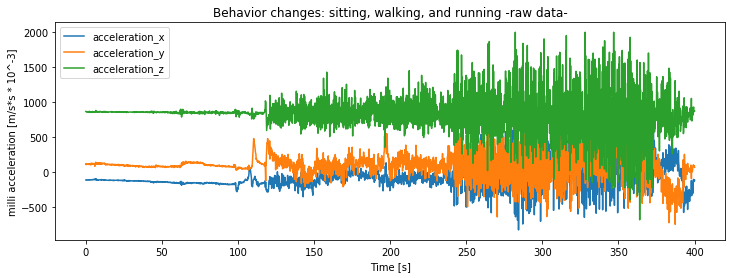

In [4]:
col = data.columns[:3]  # 各軸加速度のカラム名を取得
time = data['time']

# 生データをプロット
plt.figure(figsize=(12, 4))
for axis in col:
    y = data[axis]
    plt.plot(time, y, label=axis)
plt.title('Behavior changes: sitting, walking, and running -raw data-')
plt.xlabel('Time [s]')
plt.ylabel('milli acceleration [m/s*s * 10^-3]')
plt.legend()
plt.show()

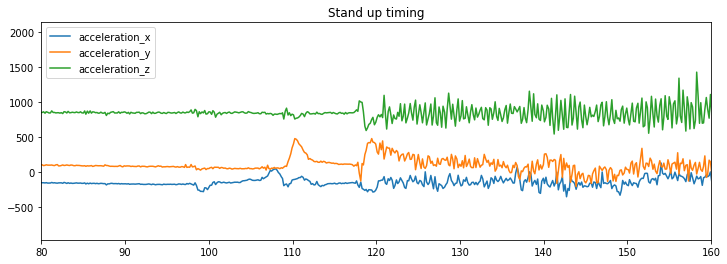

In [5]:
# 立ち上がったタイミングを確認
plt.figure(figsize=(12, 4))
for axis in col:
    y = data[axis]
    plt.plot(time, y, label=axis)

plt.title('Stand up timing')
plt.xlim(80, 160)
plt.legend()
plt.show()

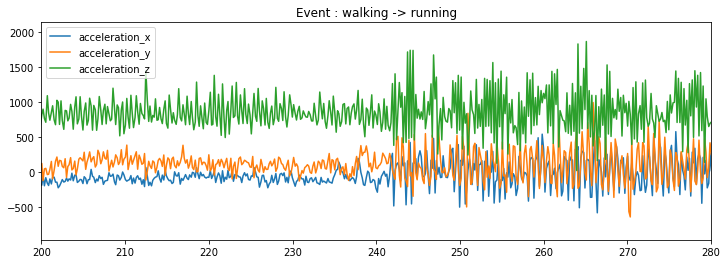

In [6]:
# 走り始めたタイミングを確認
plt.figure(figsize=(12, 4))
for axis in col:
    y = data[axis]
    plt.plot(time, y, label=axis)

plt.title('Event : walking -> running')
plt.xlim(200, 280)
plt.legend()
plt.show()

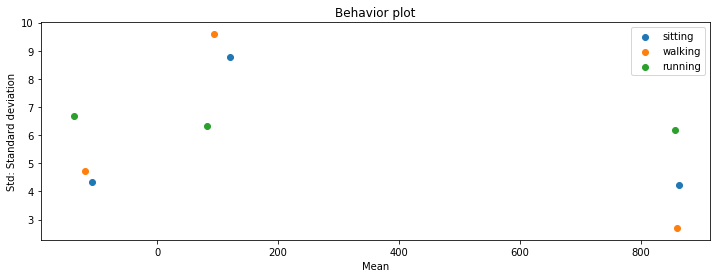

In [7]:
# 各状態のデータに切り分け
sitting = data.iloc[:110, :3]
walking = data.iloc[120:240, :3]
running = data.iloc[240:360, :3]
behaviors = {'sitting': sitting,
             'walking': walking,
             'running': running}

# 各クラスの平均・分散を求めてプロット
plt.figure(figsize=(12, 4))
features_list = []
for k, v in behaviors.items():
    mean = v.describe().loc['mean']
    std = v.describe().loc['std']
    plt.scatter(mean, std, label=k)

plt.xlabel('Mean')
plt.ylabel('Std: Standard deviation')
plt.title('Behavior plot')
plt.legend()
plt.show()